In [1]:
import sandpileCity.main as main
from sandpileCity.classIndexCoor import indexCoor
from sandpileCity.classCity import city

In [57]:
index = city(5,0.05,10000).step()

[0.5025634540597642, 0.6236814506055592]

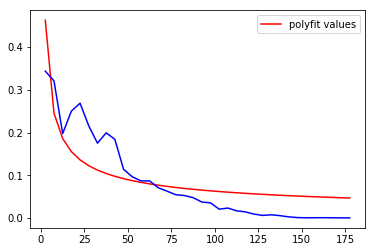

In [9]:
index.curveFit(3,5)

[0.6400012642350744, 1.0870883666147308]

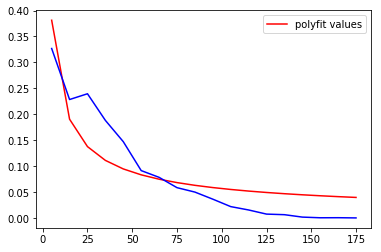

In [10]:
index.curveFit(3,10)

In [14]:
import numpy as np

In [15]:
def nodeList(index):
    nodelist = {}
    for i in index:
        if i in nodelist:
            nodelist[i][7] +=1
        else:
            nodelist[i]={5:np.linalg.norm(np.array(i)-
                    np.array(index[0])),7:1}
    return nodelist

In [16]:
def caculateT(index,deltaR):
    nodelist = indexCoor.nodeList(index)
    w = []
    delta = deltaR
    #delta = radius/2#qqq
    for key in nodelist:
        w.append([nodelist[key][5],nodelist[key][7]])
    w.sort()
    w = np.array(w)
    R = np.arange(0,np.max(w[:,0]),delta)
    RL = np.zeros((len(R),2)) 
    RL[:,0] = R
    for i in range(len(RL)):
        RL[i,1] = np.sum(w[w[:,0]<RL[i,0],1])
        #RL delta*n 列是sum
    return RL

In [23]:
a = caculateT(index,5)
a

array([[0.000e+00, 0.000e+00],
       [5.000e+00, 8.100e+01],
       [1.000e+01, 3.080e+02],
       [1.500e+01, 5.410e+02],
       [2.000e+01, 9.540e+02],
       [2.500e+01, 1.524e+03],
       [3.000e+01, 2.083e+03],
       [3.500e+01, 2.620e+03],
       [4.000e+01, 3.325e+03],
       [4.500e+01, 4.063e+03],
       [5.000e+01, 4.574e+03],
       [5.500e+01, 5.052e+03],
       [6.000e+01, 5.523e+03],
       [6.500e+01, 6.035e+03],
       [7.000e+01, 6.485e+03],
       [7.500e+01, 6.915e+03],
       [8.000e+01, 7.314e+03],
       [8.500e+01, 7.724e+03],
       [9.000e+01, 8.117e+03],
       [9.500e+01, 8.444e+03],
       [1.000e+02, 8.770e+03],
       [1.050e+02, 8.971e+03],
       [1.100e+02, 9.208e+03],
       [1.150e+02, 9.387e+03],
       [1.200e+02, 9.547e+03],
       [1.250e+02, 9.654e+03],
       [1.300e+02, 9.728e+03],
       [1.350e+02, 9.823e+03],
       [1.400e+02, 9.895e+03],
       [1.450e+02, 9.932e+03],
       [1.500e+02, 9.947e+03],
       [1.550e+02, 9.955e+03],
       [

In [24]:
a[0]

array([0., 0.])

In [25]:
x,y = [],[]
for i in a:
    x.append(i[0])
    y.append(i[1])

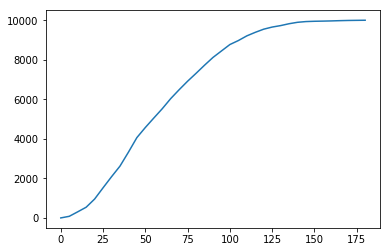

In [28]:
import matplotlib.pyplot as plt
plt.plot(x,y)

In [32]:
from scipy.optimize import curve_fit

In [58]:
def fun(x,a,b):
    return a*x**b#numpy 不支持负值的指数

def curveFit(index,deltaR):
    delta = deltaR
    x,y=[],[]
    for a in caculateT(index,delta):
        if a[0]<=40:
            x.append(a[0])
            y.append(a[1])
    popt,pcov = curve_fit(fun,x,y)
    a = popt[0]
    b = popt[1]
    yvals = fun(x,a,b)
    #plt.loglog(x, yvals, 'r',label='polyfit values')
    #plt.semilogx(x, yvals, 'r',label='polyfit values')
    plt.plot(x, yvals, 'r',label='polyfit values')
    plt.legend()
    plt.plot(x,y,"b",label = "line")
    return [a,b]

[8.667414581266357, 1.60120070473831]

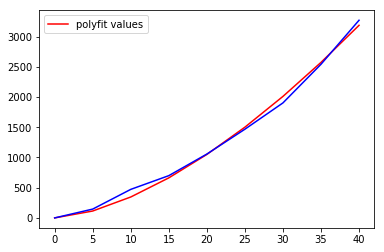

In [59]:
curveFit(index,5)

In [60]:
index2 = city(3,0.05,10000).step()

[6.818819168477599, 1.6992287068453595]

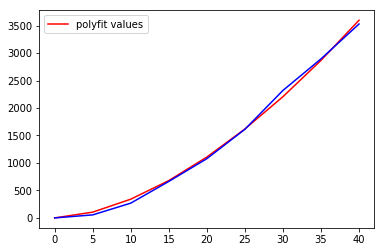

In [62]:
curveFit(index2,5)

In [65]:
index3 = city(1,0.05,10000).step()
index3.sideView()

Counter({1: 10000})

[9.690138506319558, 1.5854701149528894]

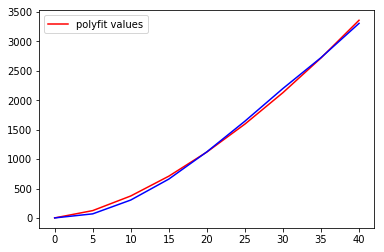

In [64]:
curveFit(index3,5)

[6.3681095098036336, 1.700960268640096]

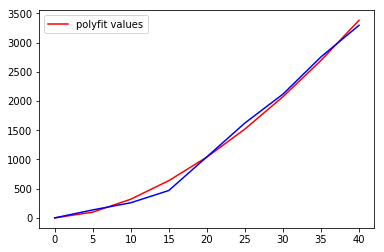

In [67]:
index4 = city(10,0.05,10000).step()
curveFit(index4,5)